In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
Sales_train = pd.read_csv("G:/Big Data/Data/Sales Prediction/Train.csv")
Sales_train["Type"] = "train"
print(Sales_train.shape)

(8523, 13)


In [71]:
Sales_test = pd.read_csv("G:/Big Data/Data/Sales Prediction/Test.csv")
Sales_test["Type"] = "test"
print(Sales_test.shape)

(5681, 12)


In [72]:
dframes = [Sales_train,Sales_test]
Sales = pd.concat(dframes,ignore_index = True)
print(Sales.shape)
Sales.tail()

(14204, 13)


,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Type
14199,Regular,FDB58,141.3154,NaN,Snack Foods,0.013496,10.5,1997,OUT046,Tier 1,Small,Supermarket Type1,test
14200,Regular,FDD47,169.1448,NaN,Starchy Foods,0.142991,7.6,2009,OUT018,Tier 3,Medium,Supermarket Type2,test
14201,Low Fat,NCO17,118.7440,NaN,Health and Hygiene,0.073529,10.0,2002,OUT045,Tier 2,NaN,Supermarket Type1,test
14202,Regular,FDJ26,214.6218,NaN,Canned,0.000000,15.3,2007,OUT017,Tier 2,NaN,Supermarket Type1,test
14203,Regular,FDU37,79.7960,NaN,Canned,0.104720,9.5,2002,OUT045,Tier 2,NaN,Supermarket Type1,test


In [73]:
Sales.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
Type                            0
dtype: int64

### To impute "Item_Weight", we are filtering the data for each unique "Item_Identifier" and then assigning the mean value of that category to the one which is "NA"

In [74]:
UniqueItems = set(Sales.Item_Identifier)

In [75]:
for each in UniqueItems:
    Sales.loc[(Sales["Item_Identifier"]==str(each)) & (Sales["Item_Weight"].isnull()),"Item_Weight"] = Sales.loc[Sales["Item_Identifier"]==str(each),"Item_Weight"].mode()[0]

In [76]:
Sales.loc[Sales["Item_Identifier"]=="DRB48",["Item_Identifier","Item_Weight"]]

,Item_Identifier,Item_Weight
103,DRB48,16.75
458,DRB48,16.75
576,DRB48,16.75
1918,DRB48,16.75
2944,DRB48,16.75
5627,DRB48,16.75
8106,DRB48,16.75
9306,DRB48,16.75
13242,DRB48,16.75


In [77]:
Sales.loc[Sales["Item_Identifier"]=="DRC01",["Item_Identifier","Item_Weight"]]

,Item_Identifier,Item_Weight
1,DRC01,5.92
2272,DRC01,5.92
2927,DRC01,5.92
5029,DRC01,5.92
5077,DRC01,5.92
5218,DRC01,5.92
9453,DRC01,5.92
10588,DRC01,5.92
12787,DRC01,5.92


In [78]:
Sales.loc[Sales["Item_Weight"].isnull(),].shape

(0, 13)

In [79]:
import datetime
now = datetime.datetime.now()

now.year

2017

In [80]:
Sales["Outlet_Age"] = now.year - Sales["Outlet_Establishment_Year"]
Sales["Outlet_Age"].head()

0    18
1     8
2    18
3    19
4    30
Name: Outlet_Age, dtype: int64

In [81]:
Sales.drop("Outlet_Establishment_Year",axis=1,inplace=True)

### Changing the categorical data to numeric/dummy

In [82]:
Sales.describe(include=["object"]).columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'Type'],
      dtype='object')

In [83]:
Sales.Outlet_Size.value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [84]:
Sales.loc[Sales["Outlet_Size"].isnull(),"Outlet_Identifier"].value_counts()

OUT045    1548
OUT017    1543
OUT010     925
Name: Outlet_Identifier, dtype: int64

### Looking for pattern for the missing Outlet_size

In [85]:
Sales.loc[(Sales["Outlet_Size"].isnull()) & (Sales["Outlet_Identifier"] == "OUT045") ,].describe(include = [object])

,Item_Fat_Content,Item_Identifier,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Type
count,1548,1548,1548,1548,1548,0.0,1548,1548
unique,5,1548,16,1,1,0.0,1,2
top,Low Fat,FDL03,Fruits and Vegetables,OUT045,Tier 2,NaN,Supermarket Type1,train
freq,932,1,218,1548,1548,NaN,1548,929


In [86]:
Sales.loc[(Sales["Outlet_Size"].isnull()) & (Sales["Outlet_Identifier"] == "OUT017") ,].describe(include = [object])

,Item_Fat_Content,Item_Identifier,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Type
count,1543,1543,1543,1543,1543,0.0,1543,1543
unique,5,1543,16,1,1,0.0,1,2
top,Low Fat,FDL03,Snack Foods,OUT017,Tier 2,NaN,Supermarket Type1,train
freq,928,1,219,1543,1543,NaN,1543,926


In [87]:
Sales.loc[(Sales["Outlet_Size"].isnull()) & (Sales["Outlet_Identifier"] == "OUT010") ,].describe(include = [object])

,Item_Fat_Content,Item_Identifier,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Type
count,925,925,925,925,925,0.0,925,925
unique,5,925,16,1,1,0.0,1,2
top,Low Fat,FDL03,Fruits and Vegetables,OUT010,Tier 3,NaN,Grocery Store,train
freq,543,1,137,925,925,NaN,925,555


### As for OUT045 and OUT017; Outlet_Location_Type	and Outlet_Type are same i.e. Tier 2 and Supermarket Type1, hence we can impute the data as per this

In [88]:
Sales.loc[(Sales["Outlet_Location_Type"]== "Tier 2") & (Sales["Outlet_Type"]=="Supermarket Type1") ,"Outlet_Size"].value_counts()

Small    1550
Name: Outlet_Size, dtype: int64

In [89]:
Sales.loc[(Sales["Outlet_Size"].isnull()) & (Sales["Outlet_Identifier"].isin(["OUT045","OUT017"])) ,"Outlet_Size"] = "Small"
Sales.loc[ (Sales["Outlet_Identifier"].isin(["OUT045","OUT017"])) ,"Outlet_Size"].value_counts()

Small    3091
Name: Outlet_Size, dtype: int64

## for "OUT010"

In [90]:
Sales.loc[(Sales["Outlet_Location_Type"]== "Tier 3") & (Sales["Outlet_Type"]=="Grocery Store") ,"Outlet_Size"].value_counts()

Series([], Name: Outlet_Size, dtype: int64)

In [91]:
Sales.loc[(Sales["Outlet_Type"]=="Grocery Store") ,"Outlet_Size"].value_counts()

Small    880
Name: Outlet_Size, dtype: int64

In [92]:
Sales.loc[(Sales["Outlet_Location_Type"]== "Tier 3") ,"Outlet_Size"].value_counts()

Medium    3105
High      1553
Name: Outlet_Size, dtype: int64

In [93]:
Sales.loc[Sales["Outlet_Size"].isnull(),].shape

(925, 13)

### To impute "Outlet_Size for OUT010", we will build a classifier

##### imputing ordinal data

In [94]:
mapping_Item_Fat_Content = {'Regular': 1, "reg": 1,'LF': 0,'Low Fat': 0, "low fat":0}
Sales['Item_Fat_Content'] = Sales['Item_Fat_Content'].map(mapping_Item_Fat_Content)

mapping_Outlet_Size = {'Small': 1, "Medium": 2,'High': 3}
Sales['Outlet_Size'] = Sales['Outlet_Size'].map(mapping_Outlet_Size)

In [95]:
Sales.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Type,Outlet_Age
0,0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,OUT049,Tier 1,2.0,Supermarket Type1,train,18
1,1,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,OUT018,Tier 3,2.0,Supermarket Type2,train,8
2,0,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,OUT049,Tier 1,2.0,Supermarket Type1,train,18
3,1,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,OUT010,Tier 3,NaN,Grocery Store,train,19
4,0,NCD19,53.8614,994.7052,Household,0.000000,8.93,OUT013,Tier 3,3.0,Supermarket Type1,train,30


##### imputing nominal data

In [96]:
Sales = pd.get_dummies(Sales,columns=["Item_Type","Outlet_Identifier","Outlet_Location_Type","Outlet_Type"],drop_first=True)

In [97]:
Sales.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Size,Type,Outlet_Age,Item_Type_Breads,...,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0,FDA15,249.8092,3735.1380,0.016047,9.30,2.0,train,18,0,...,0,0,0,0,1,0,0,1,0,0
1,1,DRC01,48.2692,443.4228,0.019278,5.92,2.0,train,8,0,...,0,0,0,0,0,0,1,0,1,0
2,0,FDN15,141.6180,2097.2700,0.016760,17.50,2.0,train,18,0,...,0,0,0,0,1,0,0,1,0,0
3,1,FDX07,182.0950,732.3800,0.000000,19.20,NaN,train,19,0,...,0,0,0,0,0,0,1,0,0,0
4,0,NCD19,53.8614,994.7052,0.000000,8.93,3.0,train,30,0,...,0,0,0,0,0,0,1,1,0,0


In [98]:
Sales.columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Visibility', 'Item_Weight', 'Outlet_Size', 'Type', 'Outlet_Age',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_

In [99]:
X_Cols = ['Item_Fat_Content', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Visibility', 'Item_Weight','Outlet_Age',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3']
y_cols = 'Outlet_Size'

In [100]:
from sklearn.model_selection import train_test_split
X = Sales.loc[(Sales[y_cols].notnull()) & (Sales['Type'] == "train"), X_Cols]
y = Sales.loc[(Sales[y_cols].notnull()) & (Sales['Type'] == "train"), y_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [101]:
print("Shape of X_train: ",X_train.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of y_test: ",y_test.shape)

Shape of X_train:  (5577, 35)
Shape of y_train:  (5577,)
Shape of X_test:  (2391, 35)
Shape of y_test:  (2391,)


In [102]:
Sales[y_cols].value_counts()

1.0    7071
2.0    4655
3.0    1553
Name: Outlet_Size, dtype: int64

### As there are 3 categories, we can use all the classificaition techniques except Logistic Regression

## Trying K-Nearest Neighbours

In [103]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [104]:
def IdentifyKValueCrossValidation(X,Y,startK,endK,cv,scoring):
    k_range = list(range(startK, endK+1))
    k_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, Y, cv=cv, scoring=scoring)
        k_scores.append(scores.mean())
    z = [i for i, j in enumerate(k_scores) if j == max(k_scores)]
    
    print("Location for Max Accuaracy is:")
    
    for i in z:
        print(k_range[i])
    
    # plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
    plt.plot(k_range, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    
    return k_range[i]

def metrices(Predicted,Actual):
    print("Confusion Matrix for the model is:\n\n {}".format(metrics.confusion_matrix(y_pred=Predicted,y_true=Actual)))
    print("\nAccuracy for the model is: {}".format(metrics.accuracy_score(y_pred=Predicted, y_true= Actual)))
    print("\nArea under the curve for the model is: {}".format(metrics.roc_auc_score(y_score=Predicted,y_true=Actual)))
    print("\nClassification Report for the model is:\n {}".format(metrics.classification_report(y_pred=Y_Predict,y_true=y_test)))

Location for Max Accuaracy is:
2
Value of K with is: 2


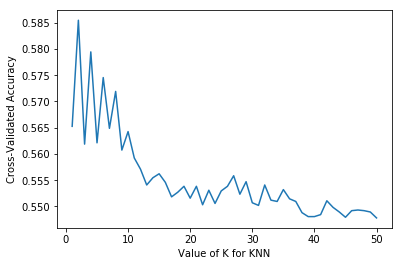

In [105]:
from sklearn.cross_validation import cross_val_score

K = IdentifyKValueCrossValidation(X=X,Y=y,cv=5,startK=1,endK=50,scoring="accuracy")
print("Value of K with is: {}".format(K))

In [106]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X=X_train,y=y_train)
Y_Predict = model.predict(X=X_test)

In [107]:
print("Test Accuracy: ", (Y_Predict == y_test).astype(int).sum()/y_test.shape[0])
#pd.Series(y_predicted).value_counts()

Test Accuracy:  0.585529067336


In [108]:
pd.Series(model.predict(X=Sales.loc[(Sales[y_cols].isnull()) & (Sales['Type'] == "train"), X_Cols])).value_counts()

1.0    535
2.0     17
3.0      3
dtype: int64

In [109]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

In [110]:
md = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X_train, y_train)

In [111]:
y_predicted = md.predict(X=X_test)
print("Test Accuracy: ", (y_predicted == y_test).astype(int).sum()/y_test.shape[0])
#pd.Series(y_predicted).value_counts()

Test Accuracy:  0.994562944375


In [112]:
pd.Series(md.predict(X=Sales.loc[(Sales[y_cols].isnull()) & (Sales['Type'] == "train"), X_Cols])).value_counts()

2.0    366
3.0    127
1.0     62
dtype: int64

### As majority of the predictions for Multinomial Logistic regression with 98% accuracy were Medium, hence we will impute accordingly

In [113]:
Sales.loc[(Sales["Outlet_Size"].isnull()),"Outlet_Size"] = 2
Sales["Outlet_Size"].value_counts()

1.0    7071
2.0    5580
3.0    1553
Name: Outlet_Size, dtype: int64

In [114]:
Sales["Outlet_Size"] = Sales["Outlet_Size"].astype(int).astype(object)
Sales["Outlet_Size"].value_counts()

1    7071
2    5580
3    1553
Name: Outlet_Size, dtype: int64

In [115]:
Sales.isnull().sum()

Item_Fat_Content                      0
Item_Identifier                       0
Item_MRP                              0
Item_Outlet_Sales                  5681
Item_Visibility                       0
Item_Weight                           0
Outlet_Size                           0
Type                                  0
Outlet_Age                            0
Item_Type_Breads                      0
Item_Type_Breakfast                   0
Item_Type_Canned                      0
Item_Type_Dairy                       0
Item_Type_Frozen Foods                0
Item_Type_Fruits and Vegetables       0
Item_Type_Hard Drinks                 0
Item_Type_Health and Hygiene          0
Item_Type_Household                   0
Item_Type_Meat                        0
Item_Type_Others                      0
Item_Type_Seafood                     0
Item_Type_Snack Foods                 0
Item_Type_Soft Drinks                 0
Item_Type_Starchy Foods               0
Outlet_Identifier_OUT013              0


## Hurray! Imputing is DONE!

In [116]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [117]:
Sales.columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Visibility', 'Item_Weight', 'Outlet_Size', 'Type', 'Outlet_Age',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_

In [118]:
XCols = ['Item_Fat_Content', 'Item_MRP',
       'Item_Visibility', 'Item_Weight', 'Outlet_Size', 'Outlet_Age',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3']
YCols = 'Item_Outlet_Sales'

In [119]:
XX = Sales.loc[Sales["Type"]=="train",XCols]
yy = Sales.loc[Sales["Type"]=="train",YCols]
print(XX.shape)
print(yy.shape)
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.3, random_state=5)

(8523, 35)
(8523,)


### Linear Regression with all the columns

In [147]:
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=True,normalize=True)
reg.fit (XX_train,yy_train)
print(reg.intercept_)
reg.coef_

6.32090293755e+15


array([  7.80093387e+01,   1.56768366e+01,  -3.23593149e+02,
        -2.79101894e+00,  -1.77149003e+15,  -1.68294231e+14,
         4.33509767e+01,  -1.26315576e+02,   8.21580028e+01,
        -2.06902677e+01,  -2.18090322e+01,   8.39730537e+01,
         1.22641077e+02,   4.34886002e+01,   1.19133091e+01,
        -3.77378369e+00,   1.48770534e+01,   3.39422354e+01,
         4.90370737e+01,  -1.81783032e+01,   5.34190066e+01,
         2.60113942e+15,  -7.55702285e+14,  -1.85337505e+14,
         8.36002481e+14,   2.13086338e+15,  -2.50819593e+14,
         8.57688690e+13,  -2.20511544e+15,  -7.70213869e+14,
        -3.13235546e+15,   4.19667515e+14,   1.02158715e+15,
        -1.66589903e+15,   5.69616235e+13])

In [148]:
print(len(reg.coef_))
len(XCols)

35


35

In [168]:
coef1 = pd.DataFrame(reg.coef_,XCols,columns=["Value"])
coef1[coef1["Value"]>0].sort_values(by="Value",ascending=False)

,Value
Outlet_Identifier_OUT013,2.601139e+15
Outlet_Identifier_OUT027,2.130863e+15
Outlet_Type_Supermarket Type1,1.021587e+15
Outlet_Identifier_OUT019,8.360025e+14
Outlet_Location_Type_Tier 3,4.196675e+14
Outlet_Identifier_OUT045,8.576887e+13
Outlet_Type_Supermarket Type3,5.696162e+13
Item_Type_Hard Drinks,1.226411e+02
Item_Type_Fruits and Vegetables,8.397305e+01
Item_Type_Canned,8.215800e+01


In [150]:
yy_predicted = reg.predict(XX_test)

In [151]:
metrics.mean_squared_error(y_true=yy_test, y_pred=yy_predicted)

1296820.5441628275

In [152]:
r2_score(yy_test, yy_predicted)

0.54979988974731175

### LASSO

In [169]:
Lasso = linear_model.LassoCV(cv=5,normalize=True)
Lasso

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=True, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [181]:
Lasso.fit(XX,yy)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=True, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [182]:
coef1 = pd.DataFrame(Lasso.coef_,XCols,columns=["Value"])
coef1[coef1["Value"]>0].sort_values(by="Value",ascending=False)

,Value
Outlet_Type_Supermarket Type1,1792.777977
Outlet_Identifier_OUT027,1685.803408
Outlet_Type_Supermarket Type3,1505.359892
Outlet_Type_Supermarket Type2,1457.378167
Outlet_Identifier_OUT035,92.951618
Item_Type_Seafood,72.471814
Outlet_Identifier_OUT017,51.646564
Outlet_Identifier_OUT049,45.421721
Item_Fat_Content,28.065341
Item_MRP,15.392157


In [183]:
yy_predicted = Lasso.predict(XX_test)

In [184]:
print(metrics.mean_squared_error(y_true=yy_test, y_pred=yy_predicted))
print(r2_score(yy_test, yy_predicted))

1285369.44861
0.553775215791


### Ridge

In [ ]:
Ridge = linear_model.Ridge(cv=5)

## Testing the MODEL to real world data

In [174]:
Sales_Predict = Sales.loc[Sales["Type"]=="test",XCols]

In [175]:
Sales_Predict.isnull().sum()

Item_Fat_Content                   0
Item_MRP                           0
Item_Visibility                    0
Item_Weight                        0
Outlet_Size                        0
Outlet_Age                         0
Item_Type_Breads                   0
Item_Type_Breakfast                0
Item_Type_Canned                   0
Item_Type_Dairy                    0
Item_Type_Frozen Foods             0
Item_Type_Fruits and Vegetables    0
Item_Type_Hard Drinks              0
Item_Type_Health and Hygiene       0
Item_Type_Household                0
Item_Type_Meat                     0
Item_Type_Others                   0
Item_Type_Seafood                  0
Item_Type_Snack Foods              0
Item_Type_Soft Drinks              0
Item_Type_Starchy Foods            0
Outlet_Identifier_OUT013           0
Outlet_Identifier_OUT017           0
Outlet_Identifier_OUT018           0
Outlet_Identifier_OUT019           0
Outlet_Identifier_OUT027           0
Outlet_Identifier_OUT035           0
O

In [176]:
Prediction = Lasso.predict(Sales_Predict)
len(Prediction)

5681

In [177]:
Data_Predicted = pd.read_csv("G:/Big Data/Data/Sales Prediction/Test.csv",usecols=["Item_Identifier","Outlet_Identifier"])

In [178]:
Data_Predicted["Item_Outlet_Sales"] = Prediction

In [179]:
Data_Predicted.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1792.274368
1,FDW14,OUT017,1589.405370
2,NCN55,OUT010,1986.161145
3,FDQ58,OUT017,2613.334450
4,FDY38,OUT027,5142.103539


In [180]:
Data_Predicted.to_csv("SalesPrediction_submission.csv", index=False)